# Esercitazione 2

## Esercizio 2.01
L'esercizio richiede di stimare l'integrale $\displaystyle I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$ utilizzando metodi Monte Carlo, sia estraendo punti da una distribuzione uniforme, sia utilizzando il metodo dell'_importance sampling_.

### Stima dell'integrale con distribuzione uniforme
Ho valutato la funzione integranda in un numero $M=10^7$ di punti distribuiti uniformemente nell'intervallo di integrazione. L'integrale è dato dalla media dell'integranda sulle $M$ valutazioni. Ho valutato l'errore attraverso il metodo della media a blocchi.

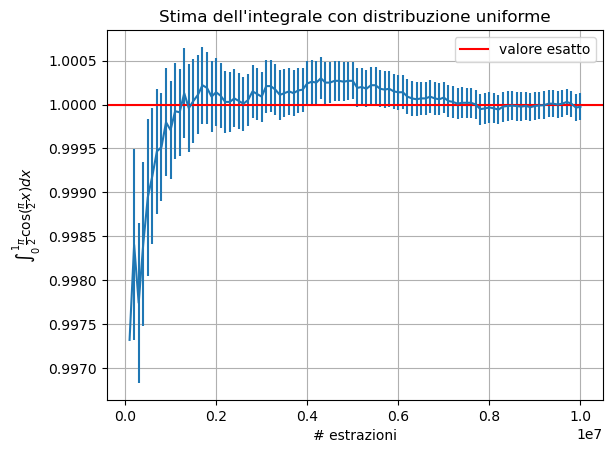

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
color_palette = sns.color_palette("bright")


x, sum41, error = np.loadtxt("risultati/unif.dat", usecols=(0,1,2), delimiter=',', unpack='true')
plt.errorbar(x,sum41,yerr=error)
plt.axhline(y=1, color="r", label='valore esatto')
plt.title("Stima dell'integrale con distribuzione uniforme" )
plt.xlabel('# estrazioni')
plt.ylabel(r'$\int_0^1 \frac{\pi}{2} \cos(\frac{\pi}{2}x)dx$')
plt.grid(True)
plt.legend()
plt.show()

### Stima dell'integrale con _importance sampling_
Ho eseguito lo stesso integrale con la tecnica dell'_importance sampling_, cioè estraendo i punti con cui valutare la funzione integranda secondo una distribuzione che approssimi il comportamento dell'integranda sull'intervallo di integrazione. A tal proposito ho scelto l'espansione di Taylor dell'integranda in $x=1$, troncata al primo ordine in $x$ e normalizzata: $d(x)=2(1-x)$. Per poter estrarre i $M=10^7$ punti dalla distribuzione, ho utilizzato un metodo Accept-Reject in un box $[0,1]\times[0,2]$. Valor medio e relativo errore sono stati stimati con il metodo della media a blocchi.

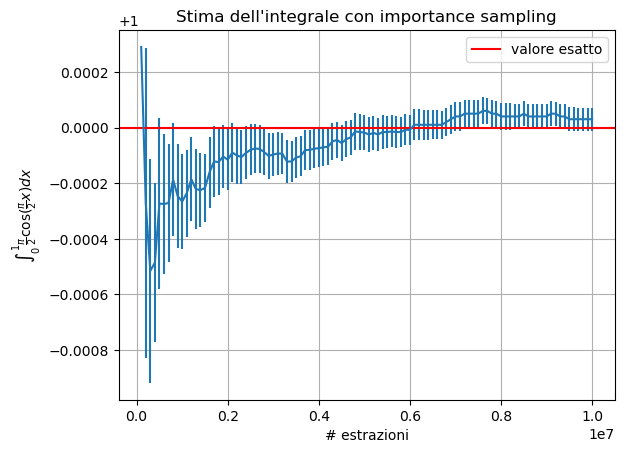

In [9]:
x2, sum42, error2 = np.loadtxt("risultati/impsamp.dat", usecols=(0,1,2), delimiter=',', unpack='true')
plt.errorbar(x,sum42,yerr=error2)
plt.axhline(y=1, color="r", label='valore esatto')
plt.title("Stima dell'integrale con importance sampling")
plt.xlabel('# estrazioni')
plt.ylabel(r'$\int_0^1 \frac{\pi}{2} \cos(\frac{\pi}{2}x)dx$')
plt.grid(True)
plt.legend()
plt.show()

Ho istituito un confronto tra l'integrale valutato con e senza importance sampling, verificando che la tecnica diminuisce la varianza sulla stima dell'integrale, e di conseguenza l'errore della stessa. Dal grafico degli errori si può vedere che entrambi scalano come $\propto \cfrac{1}{\sqrt{M}}$ in funzione del numero di punti $M$, e che l'utilizzo dell'importance sampling riduce l'errore. Il primo punto è posto a 0 per entrambe le stime degli errori, in quanto corrisponde al primo blocco per cui l'errore non è calcolabile.

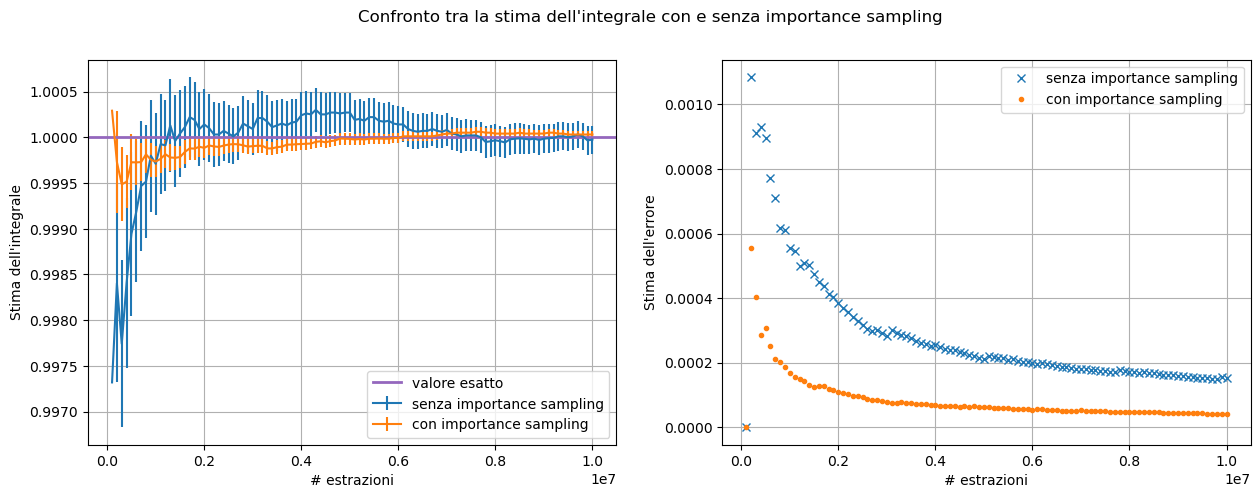

In [10]:
fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle("Confronto tra la stima dell'integrale con e senza importance sampling")

ax0.errorbar(x,sum41,yerr=error, label='senza importance sampling')
ax0.errorbar(x,sum42,yerr=error2,  label='con importance sampling')
ax0.axhline(y=1, color="C4", label='valore esatto', lw=2)
ax0.set_xlabel('# estrazioni')
ax0.set_ylabel("Stima dell'integrale")
ax0.grid(True)
ax0.legend()

ax1.plot(x, error, marker='x', linestyle='none', label='senza importance sampling')
ax1.plot(x2, error2, marker='.',linestyle='none',  label='con importance sampling')
ax1.set_xlabel('# estrazioni')
ax1.set_ylabel("Stima dell'errore")
ax1.grid(True)
ax1.legend()

plt.show()

## Esercizio 2.02
L'esercizio richiedeva di simulare un cammino random di $N=100$ passi di lunghezza $a=1$, in un reticolo (limitando gli spostamenti di un solo passo lungo uno dei tre assi cartesiani) e in un caso continuo (scegliendo una generica direzione spaziale definita dagli angoli $\theta$ e $\phi$). Ho simulato il Random Walk $M=10^5$ volte, e ho prodotto il grafico del cammino quadratico medio $\sqrt{\langle |\vec{r}_N|^2\rangle}$ in funzione dei passi $N$. Dato che si prevede che il cammino abbia un comportamento diffusivo, ho realizzato un fit del tipo $f(N)=k\sqrt{N}$, aspettandomi $k\approx a=1$.

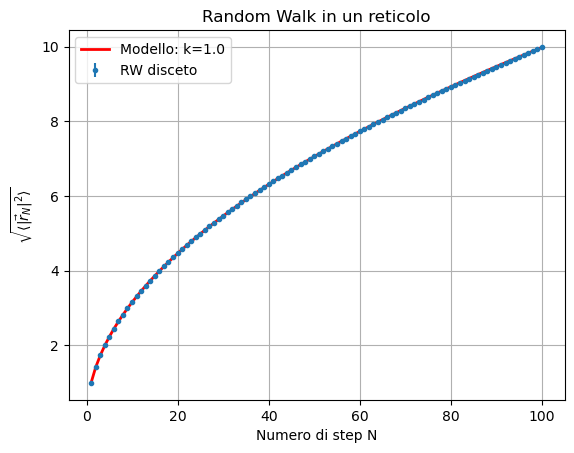

In [11]:
from scipy.optimize import curve_fit

def func(x, k):
    return k * np.sqrt(x)


x2, sum42, error2 = np.loadtxt("risultati/RWdiscr.dat", usecols=(0,1,2), delimiter=',', unpack='true')
par, cov = curve_fit(func, x2, sum42)

plt.errorbar(x2,sum42, yerr=error2, marker='.', ls='none', label="RW disceto")
plt.plot(x2, func(x2, par[0]), color="r", lw=2, label="Modello: k="+ str(round(par[0],1)))
plt.title("Random Walk in un reticolo")
plt.xlabel("Numero di step N")
plt.ylabel(r"$\sqrt{\langle |\vec{r}_N|^2\rangle}$")
plt.grid(True)
plt.legend()
plt.show()

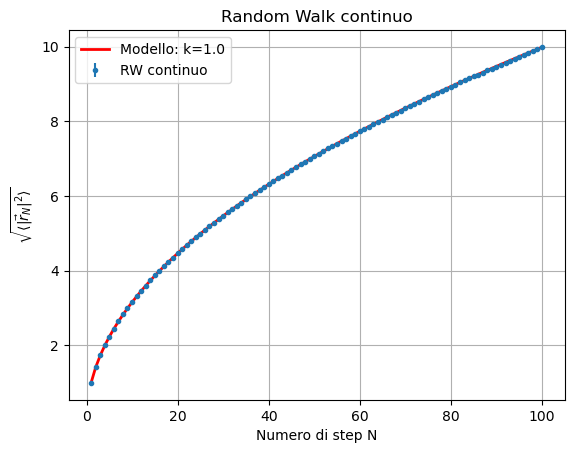

In [12]:
x2, sum42, error2 = np.loadtxt("risultati/RWcont.dat", usecols=(0,1,2), delimiter=',', unpack='true')
par, cov = curve_fit(func, x2, sum42)


plt.errorbar(x2,sum42, yerr=error2, marker='.', ls='none', label="RW continuo")
plt.plot(x2, func(x2, par[0]), color="r", lw=2, label="Modello: k="+ str(round(par[0],1)))
plt.title("Random Walk continuo")
plt.xlabel("Numero di step N")
plt.ylabel(r"$\sqrt{\langle |\vec{r}_N|^2\rangle}$")
plt.grid(True)
plt.legend()
plt.show()